In [5]:
import pandas as pd

file_name = "heart.csv"
df = pd.read_csv(file_name)
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [6]:
columns_to_drop = ['chol', 'fbs']
df = df.drop(columns=columns_to_drop)
print(df)

     age  sex  cp  trtbps  restecg  thalachh  exng  oldpeak  slp  caa  thall  \
0     63    1   3     145        0       150     0      2.3    0    0      1   
1     37    1   2     130        1       187     0      3.5    0    0      2   
2     41    0   1     130        0       172     0      1.4    2    0      2   
3     56    1   1     120        1       178     0      0.8    2    0      2   
4     57    0   0     120        1       163     1      0.6    2    0      2   
..   ...  ...  ..     ...      ...       ...   ...      ...  ...  ...    ...   
298   57    0   0     140        1       123     1      0.2    1    0      3   
299   45    1   3     110        1       132     0      1.2    1    0      3   
300   68    1   0     144        1       141     0      3.4    1    2      3   
301   57    1   0     130        1       115     1      1.2    1    1      3   
302   57    0   1     130        0       174     0      0.0    1    1      2   

     output  
0         1  
1         1

In [7]:
!pip install scikit-learn

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
# Разделение данных на признаки x и целевую переменную y

X = df.drop('output', axis=1)
y = df['output']

In [10]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#создание модели
model_reg=LogisticRegression()


In [13]:
#обучение модели
model_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
#предсказание на тестовой выборке
y_pred=model_reg.predict(X_test_scaled)

In [15]:
# вычисление точности модели лог регрессии
accuracy = accuracy_score(y_test, model_reg.predict(X_test_scaled))
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.885


In [16]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



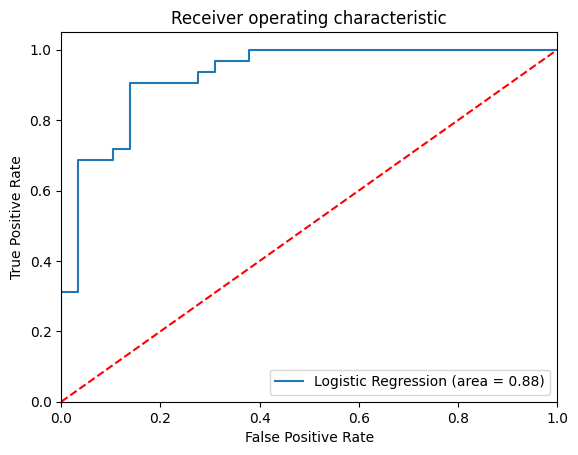

In [17]:
#построение roc кривой
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, model_reg.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, model_reg.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [14]:
#получение сводки модели с помощью statsmodels

import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.353165
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: output           Pseudo R-squared: 0.487     
Date:               2023-08-27 11:30 AIC:              192.9320  
No. Observations:   242              BIC:              231.3103  
Df Model:           10               Log-Likelihood:   -85.466   
Df Residuals:       231              LL-Null:          -166.55   
Converged:          1.0000           LLR p-value:      1.1562e-29
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0066    0.0192   0.3449  0.7302  -0.0311   0.0443
sex           -1.5714    0.4813  -3.2646  0.0011  -2.5148  -0.

In [16]:
#удаляем незначимый фактор age
X_train1 =X_train.drop('age', axis=1)

In [17]:
logit_model=sm.Logit(y_train,X_train1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.353411
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: output           Pseudo R-squared: 0.486     
Date:               2023-08-27 11:30 AIC:              191.0511  
No. Observations:   242              BIC:              225.9404  
Df Model:           9                Log-Likelihood:   -85.526   
Df Residuals:       232              LL-Null:          -166.55   
Converged:          1.0000           LLR p-value:      2.7870e-30
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sex           -1.5884    0.4781  -3.3222  0.0009  -2.5254  -0.6513
cp             0.8800    0.2069   4.2531  0.0000   0.4745   1.

In [18]:
#удаляем незначимый фактор trtbps
X_train2 = X_train1.drop('trtbps', axis=1)

In [19]:
logit_model=sm.Logit(y_train,X_train2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.356297
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: output           Pseudo R-squared: 0.482     
Date:               2023-08-27 11:31 AIC:              190.4476  
No. Observations:   242              BIC:              221.8480  
Df Model:           8                Log-Likelihood:   -86.224   
Df Residuals:       233              LL-Null:          -166.55   
Converged:          1.0000           LLR p-value:      1.1687e-30
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sex           -1.4858    0.4623  -3.2136  0.0013  -2.3920  -0.5796
cp             0.8621    0.2056   4.1932  0.0000   0.4591   1.

In [20]:
#удаляем незначимый фактор restecg
X_train3 = X_train2.drop('restecg', axis=1)

In [21]:
logit_model=sm.Logit(y_train,X_train3)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.363047
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: output           Pseudo R-squared: 0.472     
Date:               2023-08-27 11:32 AIC:              191.7149  
No. Observations:   242              BIC:              219.6264  
Df Model:           7                Log-Likelihood:   -87.857   
Df Residuals:       234              LL-Null:          -166.55   
Converged:          1.0000           LLR p-value:      1.1390e-30
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sex           -1.4941    0.4613  -3.2387  0.0012  -2.3983  -0.5899
cp             0.8238    0.2006   4.1060  0.0000   0.4306   1.

In [ ]:
columns_to_drop = ['age','trtbps','restecg']
print( X_test)
X_test1 = X_test.drop(columns_to_drop,axis=1)
print( X_test1)

In [30]:
#стандартизация данных
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train3)
X_test_scaled_new = scaler.transform(X_test1)

logreg = LogisticRegression()
logreg.fit(X_train_scaled_new, y_train)

LogisticRegression()

In [32]:
#предсказание на тестовой выборке
y_pred=logreg.predict(X_test_scaled_new)

In [33]:
# вычисление точности модели лог регрессии
accuracy = accuracy_score(y_test, logreg.predict(X_test_scaled_new))
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.869
